In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
import seaborn as sns
from collections import Counter

In [2]:
def u(x,a,s):
    if a == 0:
        return (1/(6*s))*x + 0.5
    else: 
        def b(x):
            return 1-math.e**(-a*x)
        return (b(x)-b(-3*s))/(b(3*s)-b(-3*s))
    
def us(x_list, a, s): #utility function for the list of values           
    return [u(x, a, s) for x in x_list]

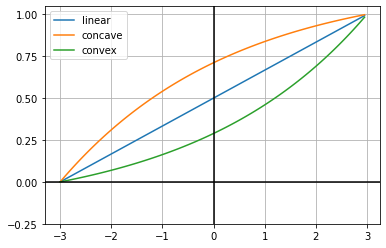

In [3]:
X = np.arange(-3,3,0.05)
Y1 = [u(x,0.3,1) for x in X]
Y2 = [u(x,-0.3,1) for x in X]
Y3 = [u(x,0,1) for x in X] 
plt.plot(X,Y3, label='linear') 
plt.plot(X,Y1, label='concave') 
plt.plot(X,Y2, label='convex') 
plt.axvline(0, color='k')
plt.axhline(0, color='k')

import matplotlib.ticker as plticker


plt.yticks(np.arange(-.25, 1.25, 0.25))

plt.grid(which='major', axis='both', linestyle='-')
plt.legend()

# Posterior disappointment - multiattribute estimates

In [4]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    out_d = {} #dictionary that is returned
    
    x_j_list = []
    x_list = []
    y_j_list = []
    y_list = []
    
    x_j_r = []
    x_j_w = []
    z = []
    z_t = []
    
    i_t = [] #list to store index of maximum true multiattribute utility
    
    #list to store index of maximum 
    i_e = [] #estimates
    i_pr = [] #posterior right way
    i_pw = [] #posterior wrong way
    
    #list to store PDS for 
    d_e = [] #estimates
    d_pr = [] #posterior right way
    d_pw = [] #posterior wrong way
    
    
    eu_1 = [] 
    eu_2 = []
    eu_3 = []
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    for k in range(10000):
        x = []
        eu = []
        eu_pr = []
        eu_pw = []

        for j in range(m): #loop for generating m number of mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the m.a.utility of one mu alternative u(x_j)           
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative            
            eu.append(cal_u(y_j)) #append the m.a.utility of one mu estimates u(y_j)
            
            x_jp_r = [] #one alternative, right way
            x_jp_w = [] #one alternative, wrong way
            
            st_l =[]
            for i in range(n): #loop for generating posterior mu for one alternative
                p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*y_j[i]
                p_var = (s[i]**2*t[i]**2)/(s[i]**2 + t[i]**2)
                st = np.sqrt(p_var)
                
                x_p_ji = list(np.random.normal(p_mean, st,1000))
                st_l.append(st)
                
                #right way
                x_jp_r.append(np.mean(us(x_p_ji, a[i], 1)))
                #wrong way
                x_jp_w.append(np.mean(x_p_ji))

            #wrong way
            eu_pw.append(cal_u(x_jp_w)) #append u(x) of one posterior alternative (repeated 1000 times)            
            
            #right way
            eu_pr.append(np.dot(w, x_jp_r)) #append w_i*E[u(x)|y]
            
        #index of true max
        max_ix = x.index(max(x))
        i_t.append(max_ix)
              
        ###Saving result from estimates
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)
        i_e.append(max_j)

        #disappointment 
        d = (x[max_j] - max_eu)/max_eu
        d_e.append(d)
        
        ###Saving result from posterior right way
        #Choose the alternative $j^$ with the highest expected utility
        max_eu1 = max(eu_pr)
        max_j1 = eu_pr.index(max_eu1)
        i_pr.append(max_j1)
        
        #disappointment 
        d2 = (x[max_j1]-max_eu1)/max_eu1
        d_pr.append(d2)
        
        #optimality gap E[u(X_{\kappa(u(Y))}-u(X_{\kappa(Z}] 
        eu_1.append(x[max_j]-x[max_j1])
        

        ###Saving result from posterior wrong way
        #Choose the alternative $j^$ with the highest expected utility
        max_eu2 = max(eu_pw)
        max_j2 = eu_pw.index(max_eu2)
        i_pw.append(max_j2)

        #disappointment 
        d3 = (x[max_j2]-max_eu2)/max_eu2
        d_pw.append(d3)    
        
        #optimality gap E[u(X_{\kappa(u(Y))}-u(Z_{\kappa(\tilde{Z})}] 
        eu_2.append(x[max_j]-x[max_j2])
        
        #optimality gap E[u(X_{\kappa(\tilde{Z})}) - u(X_{\kappa(Z))]
        eu_3.append(x[max_j2]- x[max_j1])
        
    out_d["i_t"] = i_t
    out_d["i_e"] = i_e
    out_d["i_pr"] = i_pr
    out_d["i_pw"] = i_pw
    
    out_d["d_e"] = d_e
    out_d["d_pr"] = d_pr
    out_d["d_pw"] = d_pw
    
    out_d["eu_1"] = eu_1
    out_d["eu_2"] = eu_2
    out_d["eu_3"] = eu_3
    
    return out_d

In [5]:
a_list = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [6]:
t1 = [1,0.1,0.1]
t2 = [1,1,0.1]
t3 = [1,1,1]
w1 = [1/3, 1/3, 1/3]
w2 = [0.5, 0.25, 0.25]
w3 = [0.8, 0.1, 0.1]

t = [t1, t2, t3]
w = [w1, w2, w3]

para_list = [(tt, ww) for tt in t for ww in w]

return_dict = {}
i = 0
for para in para_list: 
    t = para[0]
    w = para[1]
    print(t)
    print(w)
    
    temp_d = {}
    e=[]
    pr=[]
    pw=[]
    
    for a in a_list:
        
        r = cal_post_mu(m=5, a=[a, 0, 0], t=t, w=w)

        e.append(np.mean(r["d_e"]))
        pr.append(np.mean(r["d_pr"]))
        pw.append(np.mean(r["d_pw"]))
    temp_d["e"] = e
    temp_d["pr"] = pr
    temp_d["pw"] = pw
    
    return_dict[i] = temp_d
    i = i+1
    print(i)

[1, 0.1, 0.1]
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
1
[1, 0.1, 0.1]
[0.5, 0.25, 0.25]
2
[1, 0.1, 0.1]
[0.8, 0.1, 0.1]
3
[1, 1, 0.1]
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
4
[1, 1, 0.1]
[0.5, 0.25, 0.25]
5
[1, 1, 0.1]
[0.8, 0.1, 0.1]
6
[1, 1, 1]
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
7
[1, 1, 1]
[0.5, 0.25, 0.25]
8
[1, 1, 1]
[0.8, 0.1, 0.1]
9


In [21]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams.update({'font.size': 12})

/var/folders/m0/4kgydjmn6590r2xq4gdjzq3m0000gn/T/ipykernel_14316/2589004591.py:3: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [17]:
import pickle
with open('output_normal_pds.pkl', 'wb') as f:
    pickle.dump(return_dict, f)


In [18]:
with open('output_normal_pds.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [19]:
return_dict == loaded_dict

True

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


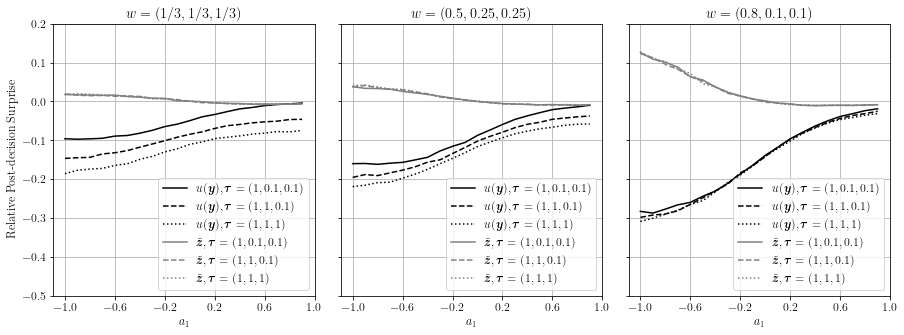

In [22]:
def plot_detail(ax, i1, i2, i3):
    
    ax.plot(x,return_dict[i1]["e"], color="black", label=r'$u(\boldsymbol{y}),\boldsymbol{\tau} =(1, 0.1, 0.1)$')
    ax.plot(x,return_dict[i2]["e"], color="black", linestyle='dashed', label=r'$u(\boldsymbol{y}),\boldsymbol{\tau} =(1, 1, 0.1)$')
    ax.plot(x,return_dict[i3]["e"], color="black", linestyle='dotted', label=r'$u(\boldsymbol{y}),\boldsymbol{\tau} =(1, 1, 1)$')

    ax.plot(x,return_dict[i1]["pw"], color="gray", label=r'$\tilde{\boldsymbol{z}}, \boldsymbol{\tau} =(1, 0.1, 0.1)$')
    ax.plot(x,return_dict[i2]["pw"], color="gray", linestyle='dashed',label=r'$\tilde{\boldsymbol{z}}, \boldsymbol{\tau} =(1, 1, 0.1)$')
    ax.plot(x,return_dict[i3]["pw"], color="gray", linestyle='dotted', label=r'$\tilde{\boldsymbol{z}}, \boldsymbol{\tau} =(1, 1, 1)$')
       
    ax.set_xlabel(r"$a1$")
    ax.grid(True)

plt.rc("font", family="serif")

fig, ax = plt.subplots(1,3, figsize=(15, 5))

x=np.arange(-1, 1, 0.1)
xticks = list(np.arange(-1, 1.1, 0.4))
yticks = list(np.arange(-0.5, 0.3, 0.1))

plot_detail(ax[0], 0,3,6) #param need to be filled
ax[0].set_xticks(xticks)
ax[0].set_xlabel(r"$a_1$")
ax[0].set_yticks(yticks)
ax[0].set_ylabel("Relative Post-decision Surprise")
ax[0].set_title(r"$w = (1/3, 1/3, 1/3)$")
ax[0].legend(loc='lower right')

plot_detail(ax[1], 1,4,7) #param need to be filled
ax[1].set_xticks(xticks)
ax[1].set_yticks(yticks)
ax[1].tick_params(labelleft= False)
ax[1].set_xlabel(r"$a_1$")
ax[1].set_title(r"$w = (0.5, 0.25, 0.25)$")
ax[1].legend(loc='lower right')

plot_detail(ax[2], 2,5,8) #param need to be filled
ax[2].set_xticks(xticks)
ax[2].set_yticks(yticks)
ax[2].tick_params(labelleft= False)
ax[2].set_xlabel(r"$a_1$")
ax[2].set_title(r"$w = (0.8, 0.1, 0.1)$")
ax[2].legend(loc='lower right')

fig.subplots_adjust(wspace=0.1)

plt.savefig('pds.eps', format="eps")          
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


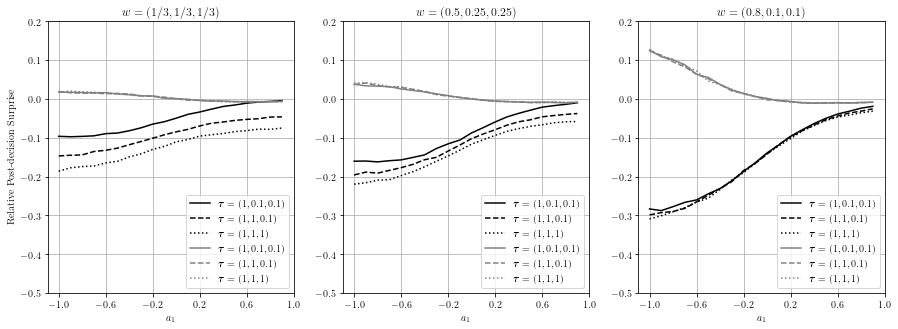

In [12]:
def plot_detail(i1, i2, i3):
    
    plt.plot(x,return_dict[i1]["e"], color="black", label=r'$\boldsymbol{\tau} =(1, 0.1, 0.1)$')
    plt.plot(x,return_dict[i2]["e"], color="black", linestyle='dashed', label=r'$\boldsymbol{\tau} =(1, 1, 0.1)$')
    plt.plot(x,return_dict[i3]["e"], color="black", linestyle='dotted', label=r'$\boldsymbol{\tau} =(1, 1, 1)$')

    plt.plot(x,return_dict[i1]["pw"], color="gray", label=r'$\boldsymbol{\tau} =(1, 0.1, 0.1)$')
    plt.plot(x,return_dict[i2]["pw"], color="gray", linestyle='dashed',label=r'$\boldsymbol{\tau} =(1, 1, 0.1)$')
    plt.plot(x,return_dict[i3]["pw"], color="gray", linestyle='dotted', label=r'$\boldsymbol{\tau} =(1, 1, 1)$')
       
    plt.xlabel(r"$a1$")
    plt.grid(True)

plt.rc("font", family="serif")

plt.figure(figsize=(15, 5))

x=np.arange(-1, 1, 0.1)
xticks = list(np.arange(-1, 1.1, 0.4))
yticks = list(np.arange(-0.5, 0.3, 0.1))

plt.subplot(131)
plot_detail(0,3,6) #param need to be filled
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel(r"$a_1$")
plt.legend(loc='lower right')
plt.ylabel("Relative Post-decision Surprise")
plt.title(r"$w = (1/3, 1/3, 1/3)$")

plt.subplot(132)
plot_detail(1,4,7) #param need to be filled
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel(r"$a_1$")
plt.title(r"$w = (0.5, 0.25, 0.25)$")
plt.legend(loc='lower right')


plt.subplot(133)
plot_detail(2,5,8) #param need to be filled
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel(r"$a_1$")

plt.title(r"$w = (0.8, 0.1, 0.1)$")
plt.legend(loc='lower right')
plt.savefig('pds.eps', format="eps")          
plt.show()